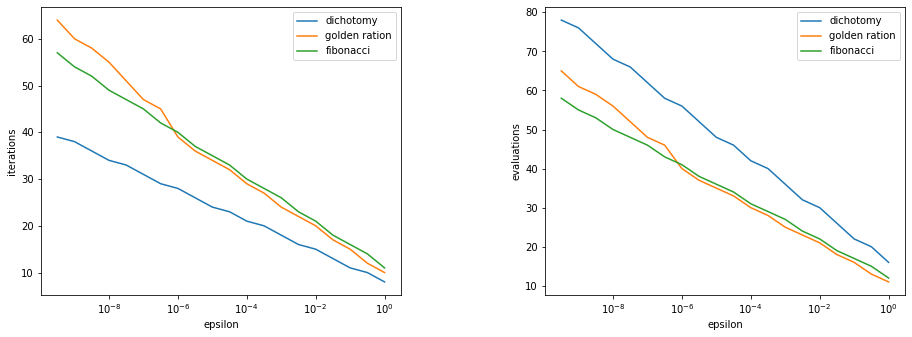

In [11]:
import matplotlib.pyplot as plt
from one_dimensional import dichotomy_method, golden_ratio_method, fibonacci_method
from math import exp, log

def compare(f, a, b):
    def get_results(method, epsilon):
        result, iterations, evaluations = method(f, a, b, epsilon)
        return [f'{result:0.10f}', str(iterations), str(evaluations)]

    def add_plot(number, xlabel, ylabel, results):
        ax = plt.subplot(1, 2, number)

        for name, result in results:
            ax.semilogx([float(x[0]) for x in result], [float(x[1]) for x in result], label=name)

        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend()

    methods = [
        ("dichotomy", dichotomy_method),
        ("golden ration", golden_ratio_method),
        ("fibonacci", fibonacci_method)
    ]
    epsilons = [10 ** -(x / 2) for x in range(20)]
    results = [
        (name, [(epsilon, get_results(function, epsilon)) for epsilon in epsilons])
        for name, function in methods
    ]

    add_plot(
        1,
        "epsilon",
        "iterations",
        [(name, [(epsilon, x[1]) for epsilon, x in values]) for name, values in results]
    )

    add_plot(
        2,
        "epsilon",
        "evaluations",
        [(name, [(epsilon, x[2]) for epsilon, x in values]) for name, values in results]
    )

    plt.subplots_adjust(top=1, bottom=0, left=0, right=2, hspace=0.5, wspace=0.4)
    plt.show()

compare(lambda x: 100 * ((x - x ** 2) ** 2) + ((1. - x) ** 2), -100, 100)
